In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json

In [2]:
games=pd.read_csv('games-list.csv')
games.head(5)

,steamId,name,playerFocus,firstReleaseDate,releaseDate,copiesSold,price,revenue,reviewScore,publisherClass,headerUrl,steamUrl,Genre
0,730,Counter-Strike 2,multiplayer,2012-05-01T00:00:00.000Z,2012-08-21T04:00:00.000Z,324048260,0.0,9898291108,86,AAA,https://shared.akamai.steamstatic.com/store_it...,https://store.steampowered.com/app/730,shooter
1,578080,PUBG: BATTLEGROUNDS,multiplayer,2017-03-01T00:00:00.000Z,2017-12-21T05:00:00.000Z,170205121,0.0,4657975430,60,AAA,https://shared.akamai.steamstatic.com/store_it...,https://store.steampowered.com/app/578080,shooter
2,570,Dota 2,multiplayer,2011-08-01T00:00:00.000Z,2013-07-09T04:00:00.000Z,209926061,0.0,2092704885,81,AAA,https://shared.akamai.steamstatic.com/store_it...,https://store.steampowered.com/app/570,MOBA
3,1172470,Apex Legends™,multiplayer,2020-11-04T05:00:00.000Z,2020-11-04T05:00:00.000Z,72407078,0.0,1491859748,67,AAA,https://shared.akamai.steamstatic.com/store_it...,https://store.steampowered.com/app/1172470,shooter
4,1085660,Destiny 2,multiplayer,2019-10-01T04:00:00.000Z,2019-10-01T04:00:00.000Z,38807878,0.0,901729917,78,AAA,https://shared.akamai.steamstatic.com/store_it...,https://store.steampowered.com/app/1085660,shooter


In [3]:
# games['price'].to_string()
## games['price']='$'+games['price']

In [4]:
games['releaseDate']=games.releaseDate.str[:-14]
games['firstReleaseDate']=games.firstReleaseDate.str[:-14]
games['revenue']=games['revenue']/1000000
games=games.rename(columns = {'revenue': 'revenue_in_millions'})
useful_games=games.drop(columns = ['steamId','steamId','headerUrl','steamUrl','publisherClass'])
useful_games['releaseYear']=games.releaseDate.str[:4].astype(int)
useful_games['revenue_in_millions'].astype(int)
useful_games['yearsOut']=2025-(useful_games.releaseYear)+1
useful_games['avgRevenue']=(useful_games.revenue_in_millions/useful_games.yearsOut).round()
useful_games=useful_games.rename(columns = {'avgRevenue': 'avgRevenue_in_millions'})
useful_games.head(10)

,name,playerFocus,firstReleaseDate,releaseDate,copiesSold,price,revenue_in_millions,reviewScore,Genre,releaseYear,yearsOut,avgRevenue_in_millions
0,Counter-Strike 2,multiplayer,2012-05-01,2012-08-21,324048260,0.00,9898.291108,86,shooter,2012,14,707.0
1,PUBG: BATTLEGROUNDS,multiplayer,2017-03-01,2017-12-21,170205121,0.00,4657.975430,60,shooter,2017,9,518.0
2,Dota 2,multiplayer,2011-08-01,2013-07-09,209926061,0.00,2092.704885,81,MOBA,2013,13,161.0
3,Apex Legends™,multiplayer,2020-11-04,2020-11-04,72407078,0.00,1491.859748,67,shooter,2020,6,249.0
4,Destiny 2,multiplayer,2019-10-01,2019-10-01,38807878,0.00,901.729917,78,shooter,2019,7,129.0
5,Warframe,multiplayer,2013-03-25,2013-03-25,47027278,0.00,878.988332,87,shooter,2013,13,68.0
6,Cyberpunk 2077,singleplayer,2020-12-09,2020-12-09,22351297,59.99,785.976776,86,shooter,2020,6,131.0
7,ELDEN RING,singleplayer,2022-02-24,2022-02-24,19456940,59.99,780.021669,93,action,2022,4,195.0
8,Baldur's Gate 3,singleplayer,2020-10-06,2023-08-03,15764595,59.99,773.136638,97,rpg,2023,3,258.0
9,Black Myth: Wukong,singleplayer,2024-08-19,2024-08-19,16882598,59.99,732.397574,97,action,2024,2,366.0


In [5]:
genres=useful_games.Genre.value_counts()
genres

Genre
shooter     37
action      32
strategy     9
sandbox      8
mmo          4
rpg          4
driving      2
puzzle       2
MOBA         1
card         1
Name: count, dtype: int64

In [6]:
genres2=useful_games.groupby('Genre')['avgRevenue_in_millions'].mean()
genres2.head(5)

Genre
MOBA       161.00000
action      72.21875
card        54.00000
driving     32.50000
mmo         81.75000
Name: avgRevenue_in_millions, dtype: float64

C:\Users\Owner\AppData\Local\Temp\ipykernel_17316\2777337837.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(useful_games.groupby('Genre')['avgRevenue_in_millions'].mean(),  edgecolor = 'black', palette="viridis");


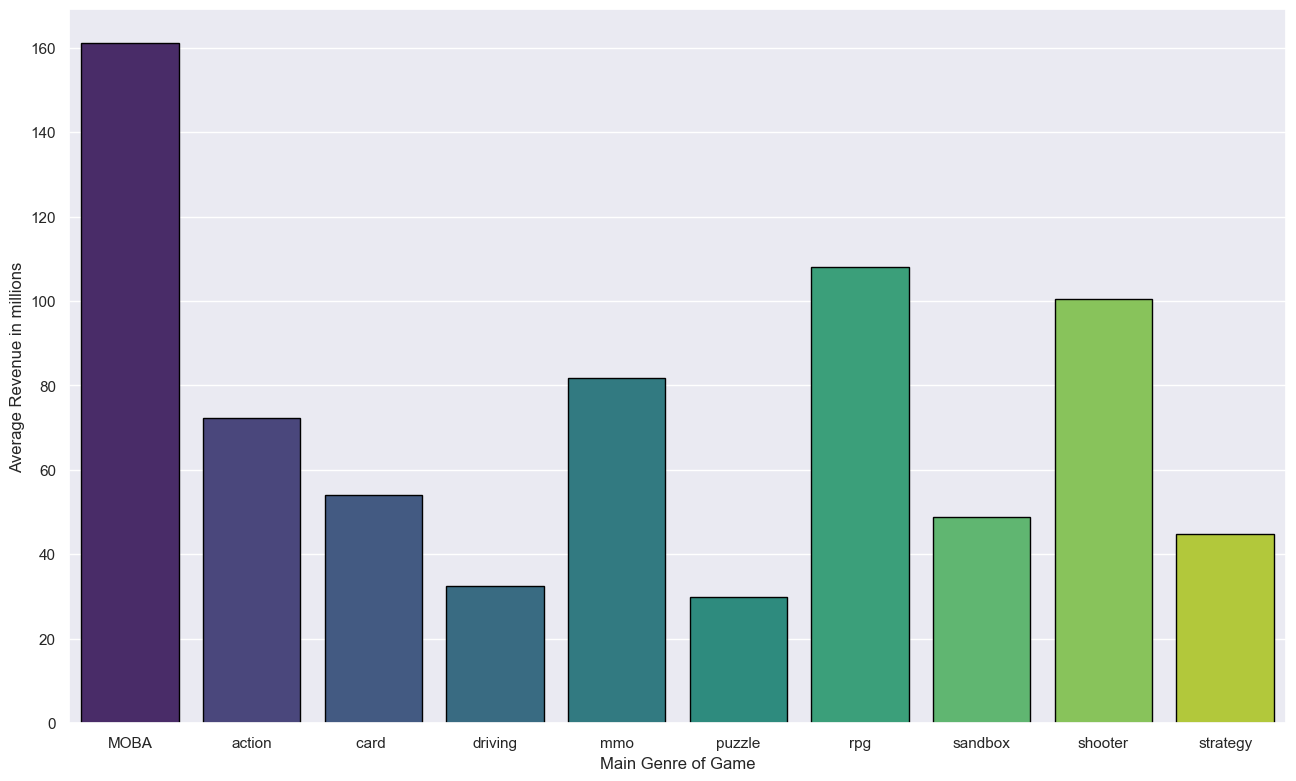

In [7]:
sns.set_theme(rc={'figure.figsize':(15.7,9.27)}),
sns.barplot(useful_games.groupby('Genre')['avgRevenue_in_millions'].mean(),  edgecolor = 'black', palette="viridis");
plt.xticks(rotation=0) 
plt.xlabel('Main Genre of Game')
plt.ylabel('Average Revenue in millions')
plt.savefig('../releasebyyr2.png', bbox_inches='tight', pad_inches=0.1)

C:\Users\Owner\AppData\Local\Temp\ipykernel_17316\205973843.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(useful_games.groupby('price')['avgRevenue_in_millions'].mean(),  edgecolor = 'black', palette="viridis");


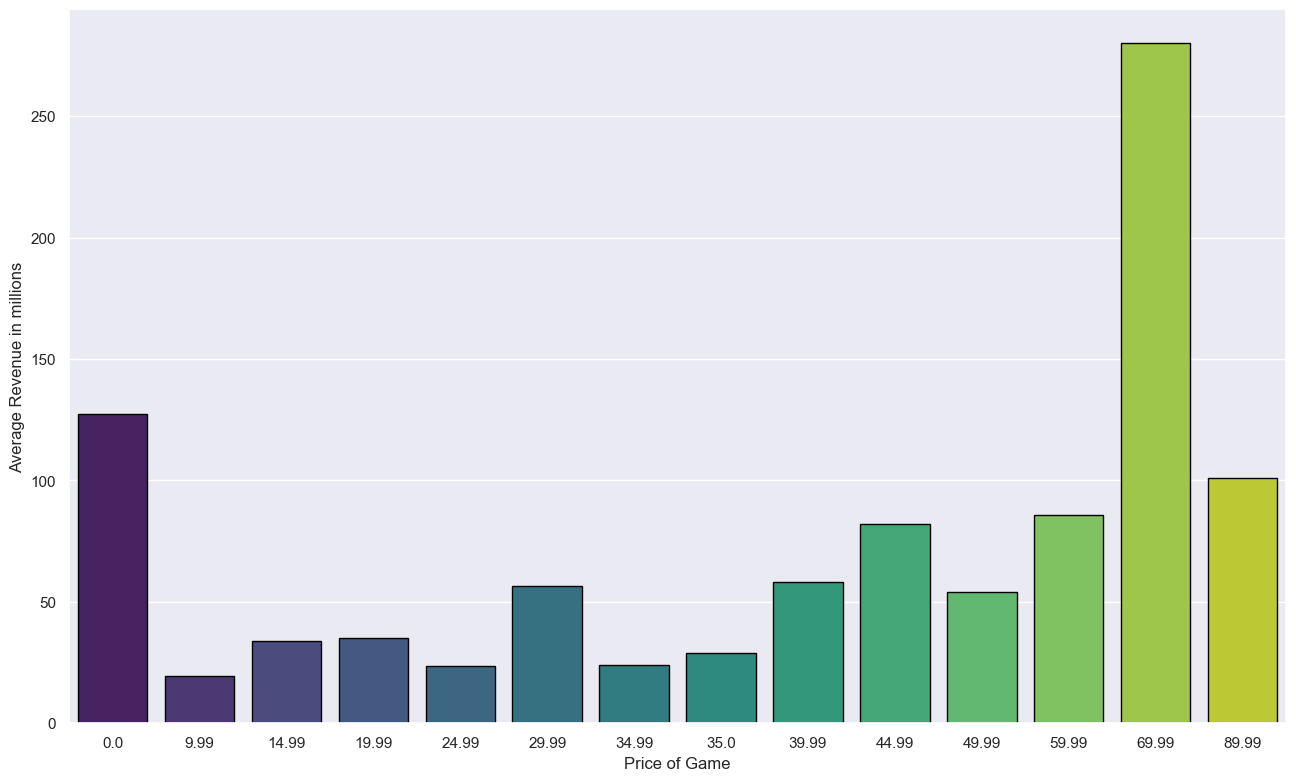

In [20]:
sns.set_theme(rc={'figure.figsize':(15.7,9.27)}),
sns.barplot(useful_games.groupby('price')['avgRevenue_in_millions'].mean(),  edgecolor = 'black', palette="viridis");
plt.xticks(rotation=0) 
plt.xlabel('Price of Game')
plt.ylabel('Average Revenue in millions')
plt.savefig('../releasebyyr5.png', bbox_inches='tight', pad_inches=0.1)

In [9]:
revenuebycost=useful_games.price.value_counts()
revenuebycost

price
0.00     21
59.99    20
39.99    12
29.99    11
49.99     8
19.99     7
9.99      6
14.99     3
69.99     3
44.99     3
24.99     3
89.99     1
34.99     1
35.00     1
Name: count, dtype: int64

In [10]:
pricerange=useful_games.sort_values(by='price')
pricerange

,name,playerFocus,firstReleaseDate,releaseDate,copiesSold,price,revenue_in_millions,reviewScore,Genre,releaseYear,yearsOut,avgRevenue_in_millions
0,Counter-Strike 2,multiplayer,2012-05-01,2012-08-21,324048260,0.00,9898.291108,86,shooter,2012,14,707.0
1,PUBG: BATTLEGROUNDS,multiplayer,2017-03-01,2017-12-21,170205121,0.00,4657.975430,60,shooter,2017,9,518.0
2,Dota 2,multiplayer,2011-08-01,2013-07-09,209926061,0.00,2092.704885,81,MOBA,2013,13,161.0
3,Apex Legends™,multiplayer,2020-11-04,2020-11-04,72407078,0.00,1491.859748,67,shooter,2020,6,249.0
4,Destiny 2,multiplayer,2019-10-01,2019-10-01,38807878,0.00,901.729917,78,shooter,2019,7,129.0
...,...,...,...,...,...,...,...,...,...,...,...,...
64,Far Cry® 5,singleplayer,2018-03-26,2018-03-26,8459066,59.99,183.984856,81,shooter,2018,8,23.0
21,Battlefield™ 6,multiplayer,2025-10-10,2025-10-10,6659444,69.99,410.214417,70,shooter,2025,1,410.0
62,Starfield,singleplayer,2023-09-05,2023-09-05,2998105,69.99,186.033967,57,shooter,2023,3,62.0
27,Monster Hunter Wilds,multiplayer,2025-02-27,2025-02-27,6139901,69.99,367.940754,45,action,2025,1,368.0


In [11]:
score=useful_games.sort_values(by='reviewScore').head(10)
years=useful_games.sort_values(by='releaseYear')
revbyyear=years.groupby('releaseYear')['revenue_in_millions'].sum().to_frame
revbyyear

<bound method Series.to_frame of releaseYear
2006     182.330303
2007     338.791234
2009     408.206985
2010     169.847668
2011     333.154822
2012    9898.291108
2013    4263.846912
2015    1817.665718
2016    2646.849311
2017    5671.306387
2018    2211.733383
2019    2538.350769
2020    4307.397806
2021    1479.675497
2022    2724.384531
2023    1953.007490
2024    3142.039486
2025    1186.285611
Name: revenue_in_millions, dtype: float64>

C:\Users\Owner\AppData\Local\Temp\ipykernel_17316\1794027852.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(years['releaseYear'].value_counts().sort_index(),  edgecolor = 'black', palette="viridis");


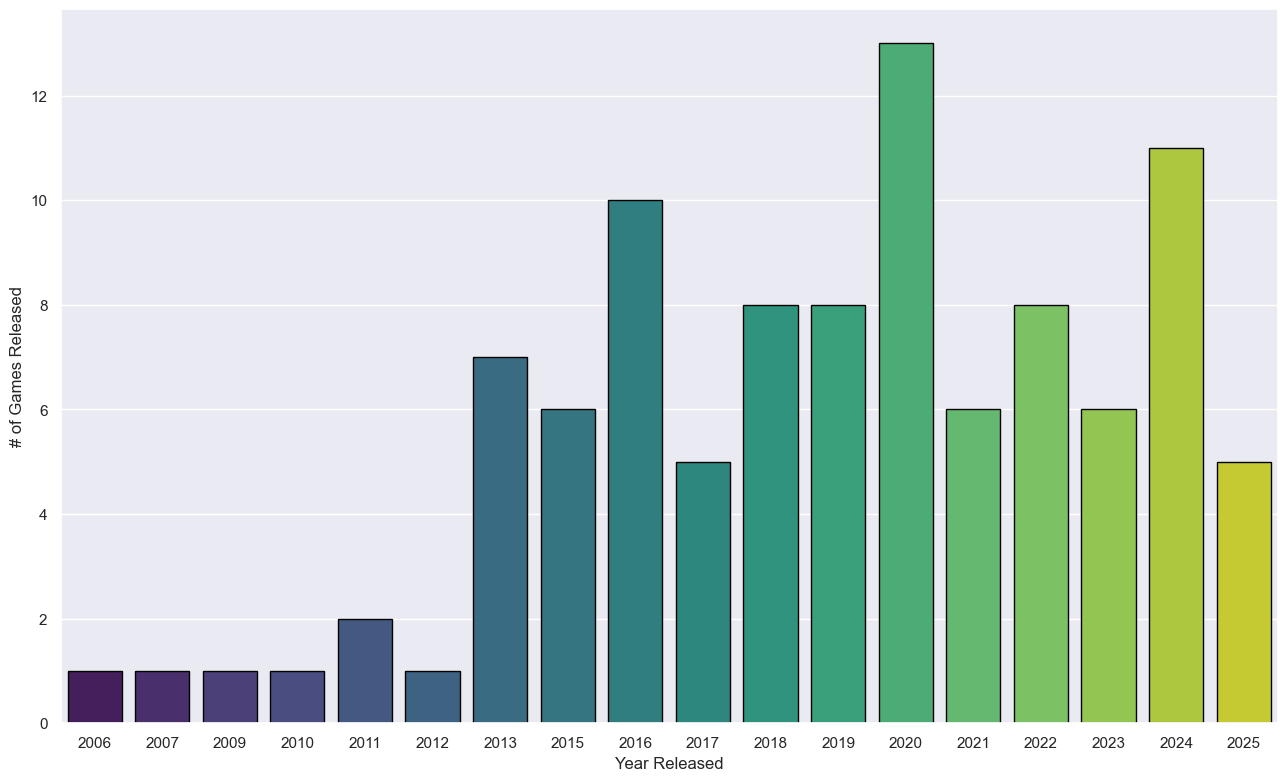

In [12]:
sns.set_theme(rc={'figure.figsize':(15.7,9.27)}),
sns.barplot(years['releaseYear'].value_counts().sort_index(),  edgecolor = 'black', palette="viridis");
plt.xticks(rotation=0) 
plt.xlabel('Year Released')
plt.ylabel('# of Games Released')
plt.savefig('../releasebyyr.png', bbox_inches='tight', pad_inches=0.1)

In [13]:
outliers= [2020]

outlieryears= years.loc[years.releaseYear.isin(outliers)]
outlieryears=outlieryears.sort_values(by='price')
outlieryears.head(5)

,name,playerFocus,firstReleaseDate,releaseDate,copiesSold,price,revenue_in_millions,reviewScore,Genre,releaseYear,yearsOut,avgRevenue_in_millions
3,Apex Legends™,multiplayer,2020-11-04,2020-11-04,72407078,0.00,1491.859748,67,shooter,2020,6,249.0
84,The Sims™ 4,singleplayer,2020-06-18,2020-06-18,25122188,0.00,154.295672,87,sandbox,2020,6,26.0
39,Phasmophobia,multiplayer,2020-09-18,2020-09-18,22183701,19.99,254.295714,96,action,2020,6,42.0
78,Hades,singleplayer,2019-12-10,2020-09-17,11032518,24.99,160.080973,98,action,2020,6,27.0
77,Risk of Rain 2,multiplayer,2019-03-28,2020-08-11,12039856,24.99,167.617913,93,action,2020,6,28.0


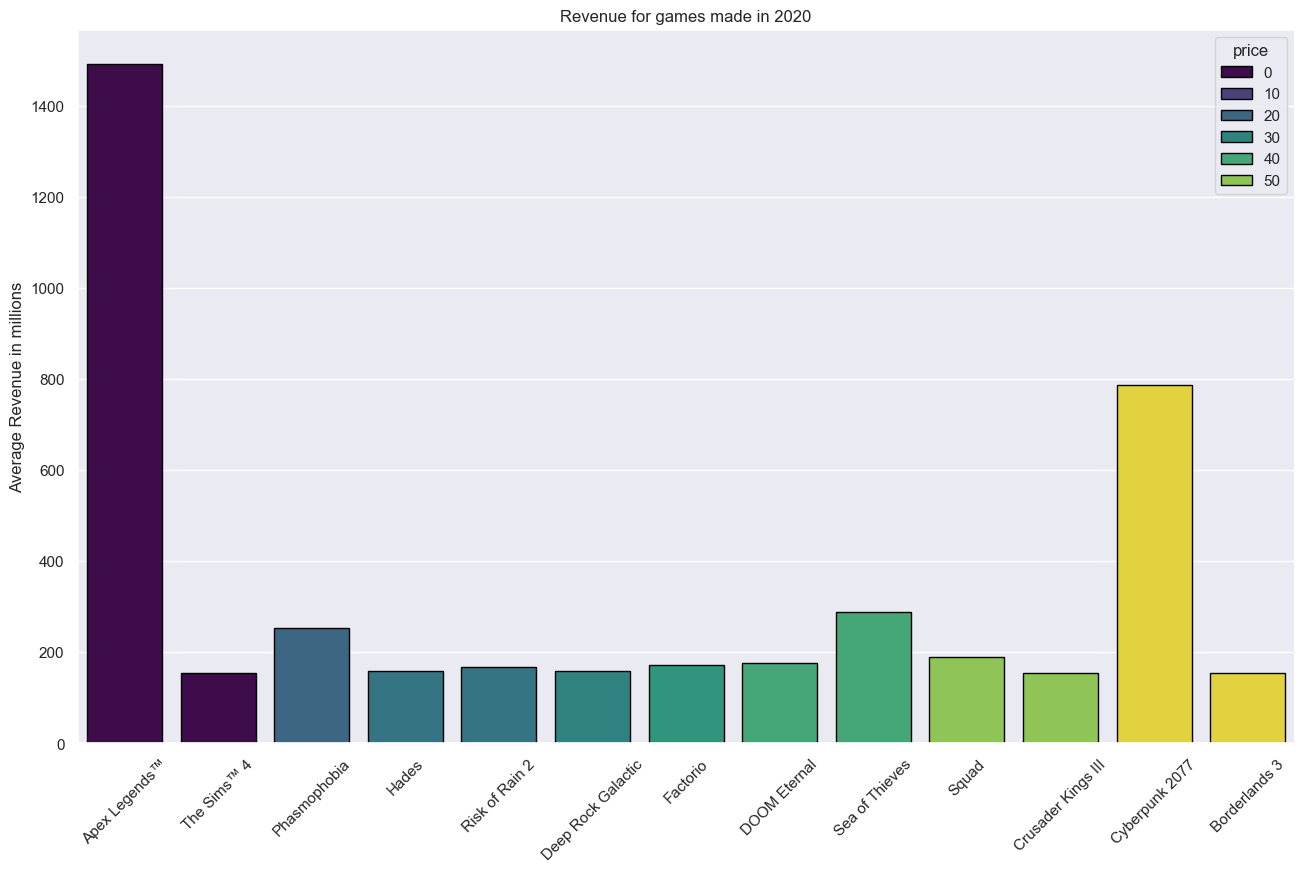

In [14]:
sns.barplot(data=outlieryears,
            x='name', hue='price',
            y= 'revenue_in_millions', 
            edgecolor = 'black', palette="viridis", legend=True);

plt.title('Revenue for games made in 2020')
plt.xlabel('')
plt.ylabel('Average Revenue in millions')
plt.xticks(rotation=45) ;   
plt.savefig('../outliers.png', bbox_inches='tight', pad_inches=0.1)

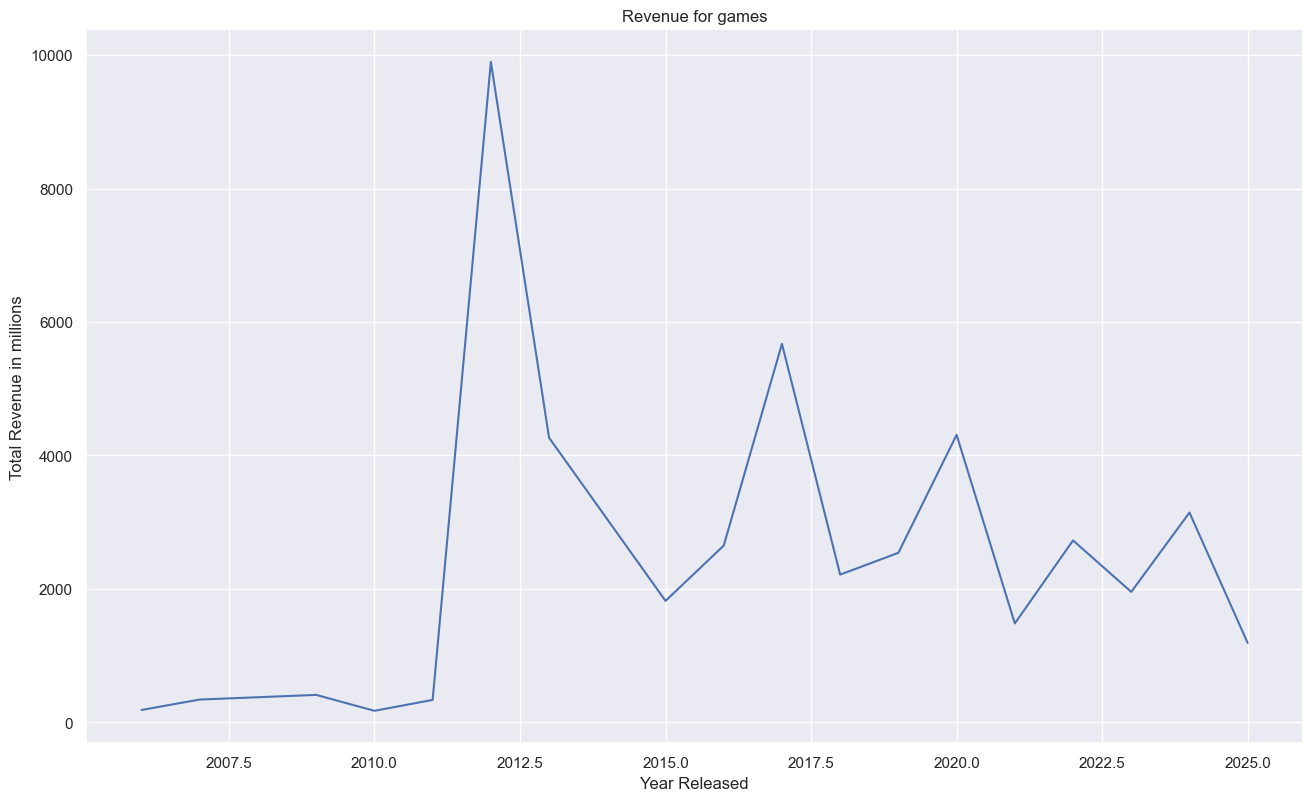

In [15]:
sns.set_theme(rc={'figure.figsize':(15.7,9.27)}),
sns.lineplot(years.groupby('releaseYear')['revenue_in_millions'].sum());
plt.xticks(rotation=0) 
plt.xlabel('Year Released')
plt.ylabel('Total Revenue in millions')
plt.title('Revenue for games')

plt.savefig('../releasebyline.png', bbox_inches='tight', pad_inches=0.1)

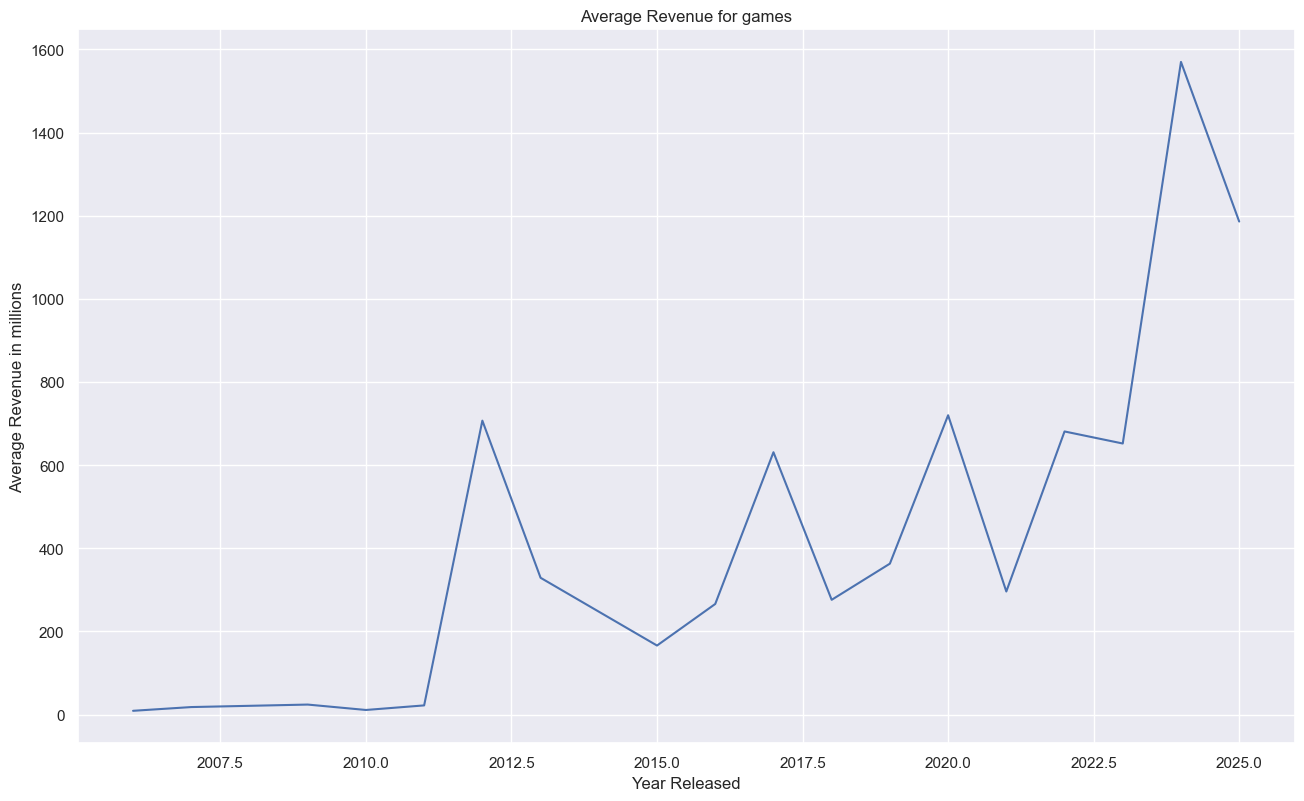

In [16]:
sns.set_theme(rc={'figure.figsize':(15.7,9.27)}),
sns.lineplot(years.groupby('releaseYear')['avgRevenue_in_millions'].sum());
plt.xticks(rotation=0) 
plt.xlabel('Year Released')
plt.ylabel('Average Revenue in millions')
plt.title('Average Revenue for games')

plt.savefig('../releasebyline2.png', bbox_inches='tight', pad_inches=0.1)

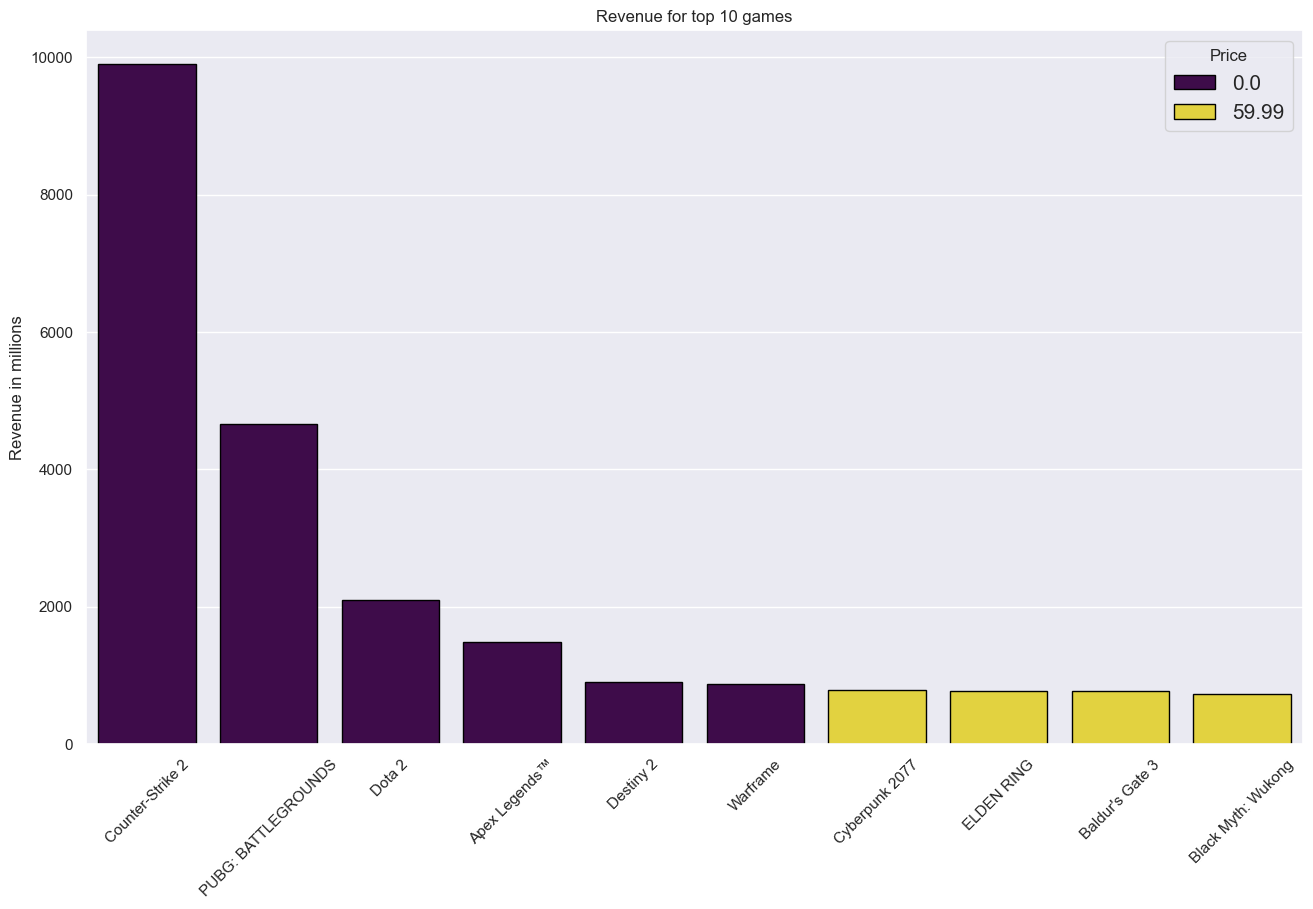

In [19]:
sns.barplot(data=games.head(10),
                x='name',
                y='revenue_in_millions',
                hue='price',
                 edgecolor = 'black', palette="viridis")
plt.legend(fontsize = 15, title='Price')
plt.xticks(rotation=45) 
plt.title('Revenue for top 10 games')
plt.ylabel('Revenue in millions')

plt.xlabel('')
plt.savefig('../top10.png', bbox_inches='tight', pad_inches=0.1)

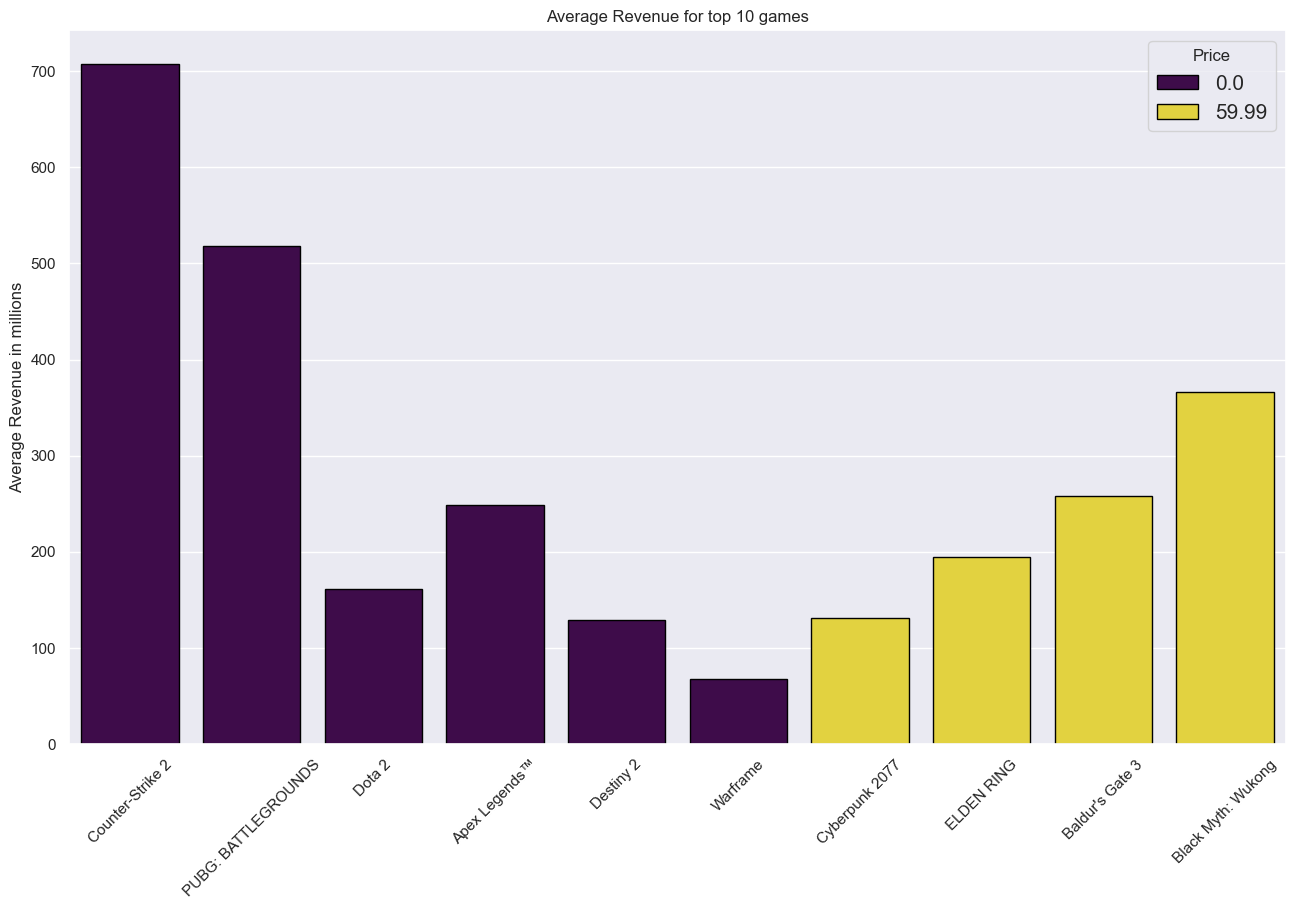

In [18]:
sns.barplot(data=useful_games.head(10),
                x='name',
                y='avgRevenue_in_millions',
                hue='price',
                 edgecolor = 'black', palette="viridis")
plt.legend(fontsize = 15, title='Price')
plt.xticks(rotation=45) 
plt.title('Average Revenue for top 10 games')
plt.ylabel('Average Revenue in millions')

plt.xlabel('')
plt.savefig('../top11.png', bbox_inches='tight', pad_inches=0.1)